In [ ]:
install.packages(c("forecast", "arules"))


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’, ‘plyr’




In [ ]:
# Crime Pattern Analysis in India (A Data Mining Case Study)
# Load necessary libraries
library(ggplot2)
library(dplyr)
library(lubridate)
library(forecast)
library(cluster)
library(arules)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: Matrix


Attaching package: ‘arules’


The following object is masked from ‘package:dplyr’:

    recode


The following objects are masked from ‘package:base’:

    abbreviate, write




In [ ]:
# Step 1: Load the dataset 📂
crime_data <- read.csv("/content/crime_dataset_india.csv", stringsAsFactors = FALSE)
head(crime_data)

,Report.Number,Date.Reported,Date.of.Occurrence,Time.of.Occurrence,City,Crime.Code,Crime.Description,Victim.Age,Victim.Gender,Weapon.Used,Crime.Domain,Police.Deployed,Case.Closed,Date.Case.Closed
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
1,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,
2,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,
3,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,
4,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00
5,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00
6,6,02-01-2020 03:00,01-01-2020 05:00,01-01-2020 17:09,Delhi,442,ASSAULT,16,M,Firearm,Violent Crime,18,Yes,30-03-2020 03:00


In [ ]:
# Convert 'Date.Reported' to Date format
crime_data$Date.Reported <- as.Date(crime_data$Date.Reported, format="%d-%m-%Y")

# Remove rows with missing values
crime_data <- na.omit(crime_data)
print(crime_data)

     Report.Number Date.Reported Date.of.Occurrence Time.of.Occurrence
1                1    2020-01-02   01-01-2020 00:00   01-01-2020 01:11
2                2    2020-01-01   01-01-2020 01:00   01-01-2020 06:26
3                3    2020-01-02   01-01-2020 02:00   01-01-2020 14:30
4                4    2020-01-01   01-01-2020 03:00   01-01-2020 14:46
5                5    2020-01-01   01-01-2020 04:00   01-01-2020 16:51
6                6    2020-01-02   01-01-2020 05:00   01-01-2020 17:09
7                7    2020-01-01   01-01-2020 06:00   01-01-2020 14:08
8                8    2020-01-02   01-01-2020 07:00   02-01-2020 06:33
9                9    2020-01-04   01-01-2020 08:00   02-01-2020 06:34
10              10    2020-01-03   01-01-2020 09:00   01-01-2020 17:50
11              11    2020-01-02   01-01-2020 10:00   01-01-2020 19:42
12              12    2020-01-03   01-01-2020 11:00   01-01-2020 22:16
13              13    2020-01-01   01-01-2020 12:00   01-01-2020 23:14
14    

In [ ]:
summary(crime_data)

 Report.Number   Date.Reported        Date.of.Occurrence Time.of.Occurrence
 Min.   :    1   Min.   :2020-01-01   Length:40160       Length:40160      
 1st Qu.:10041   1st Qu.:2021-02-24   Class :character   Class :character  
 Median :20080   Median :2022-04-18   Mode  :character   Mode  :character  
 Mean   :20080   Mean   :2022-04-17                                        
 3rd Qu.:30120   3rd Qu.:2023-06-10                                        
 Max.   :40160   Max.   :2024-08-02                                        
     City             Crime.Code    Crime.Description    Victim.Age   
 Length:40160       Min.   :100.0   Length:40160       Min.   :10.00  
 Class :character   1st Qu.:225.0   Class :character   1st Qu.:27.00  
 Mode  :character   Median :349.0   Mode  :character   Median :44.00  
                    Mean   :349.4                      Mean   :44.49  
                    3rd Qu.:474.0                      3rd Qu.:62.00  
                    Max.   :599.0         

In [ ]:
# Analyzing crime trends over time
crime_trend <- crime_data %>%
  group_by(Date.Reported) %>%
  summarise(Crime_Count = n())

In [ ]:
# Predicting future crime trends using time series forecasting
ts_crime <- ts(crime_trend$Crime_Count, frequency=365)
crime_forecast <- forecast(auto.arima(ts_crime), h=30)


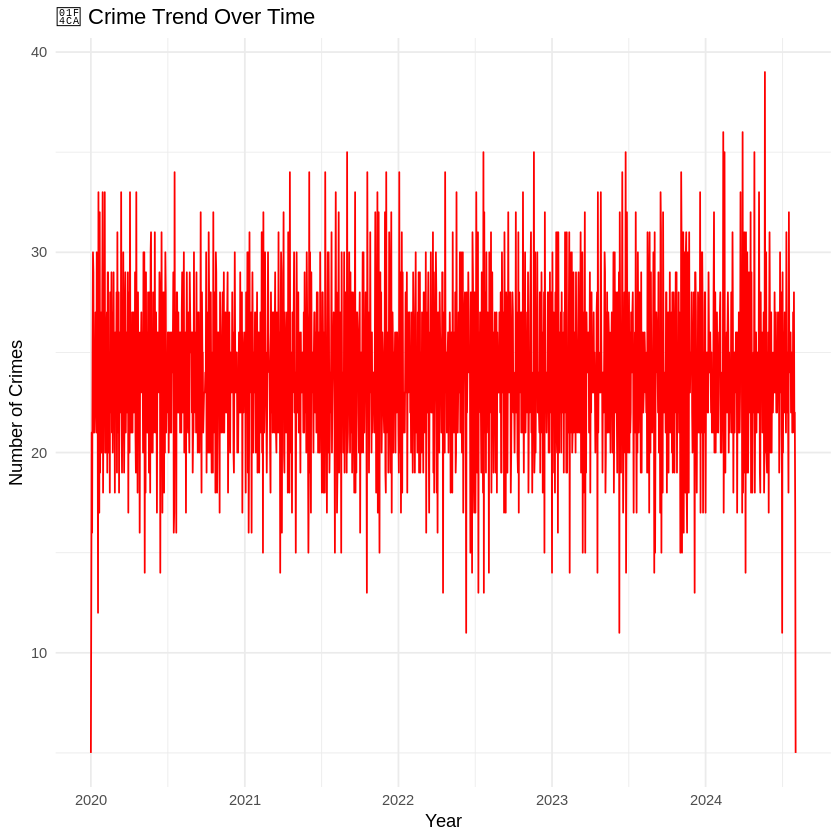

In [ ]:
# Visualization: Crime Trend Forecast
ggplot(crime_trend, aes(x=Date.Reported, y=Crime_Count)) +
  geom_line(color='red') +
  ggtitle("📊 Crime Trend Over Time") +
  xlab("Year") +
  ylab("Number of Crimes") +
  theme_minimal()


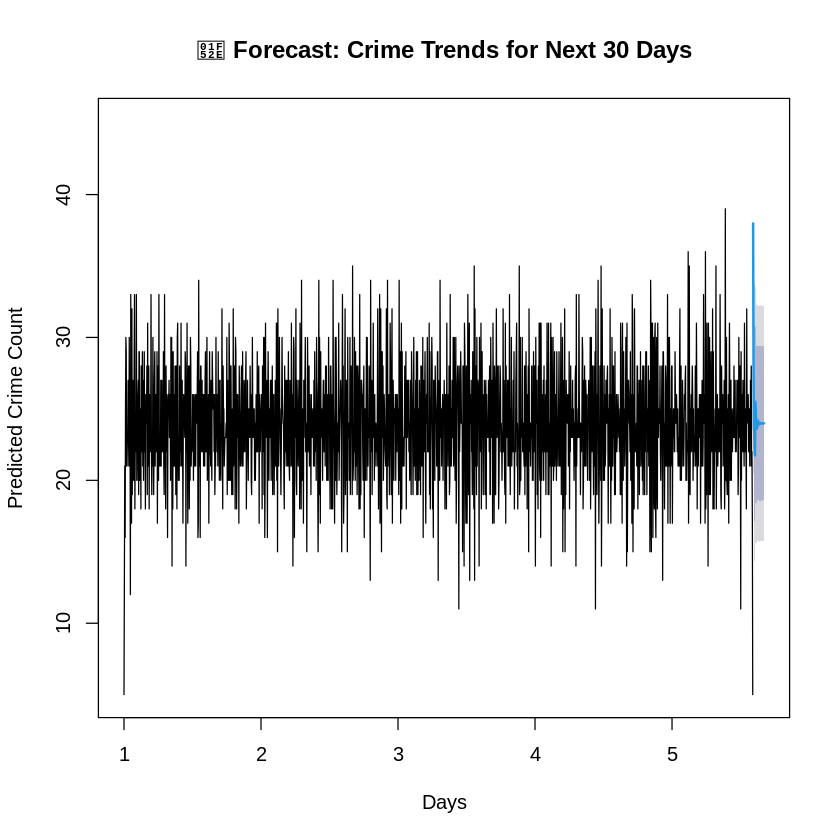

In [ ]:
# Forecast Plot
plot(crime_forecast, main="Forecast: Crime Trends for Next 30 Days", xlab="Days", ylab="Predicted Crime Count")


In [ ]:

# Step 4: What are the most common crimes?

crime_types <- crime_data %>%
  group_by(Crime.Description) %>%
  summarise(Frequency = n()) %>%
  arrange(desc(Frequency))

top_crimes <- head(crime_types, 10)
print(top_crimes)

# A tibble: 10 × 2
   Crime.Description Frequency
   <chr>                 <int>
 1 BURGLARY               1980
 2 VANDALISM              1975
 3 FRAUD                  1965
 4 DOMESTIC VIOLENCE      1932
 5 FIREARM OFFENSE        1931
 6 ROBBERY                1928
 7 KIDNAPPING             1920
 8 IDENTITY THEFT         1918
 9 SEXUAL ASSAULT         1917
10 ASSAULT                1915


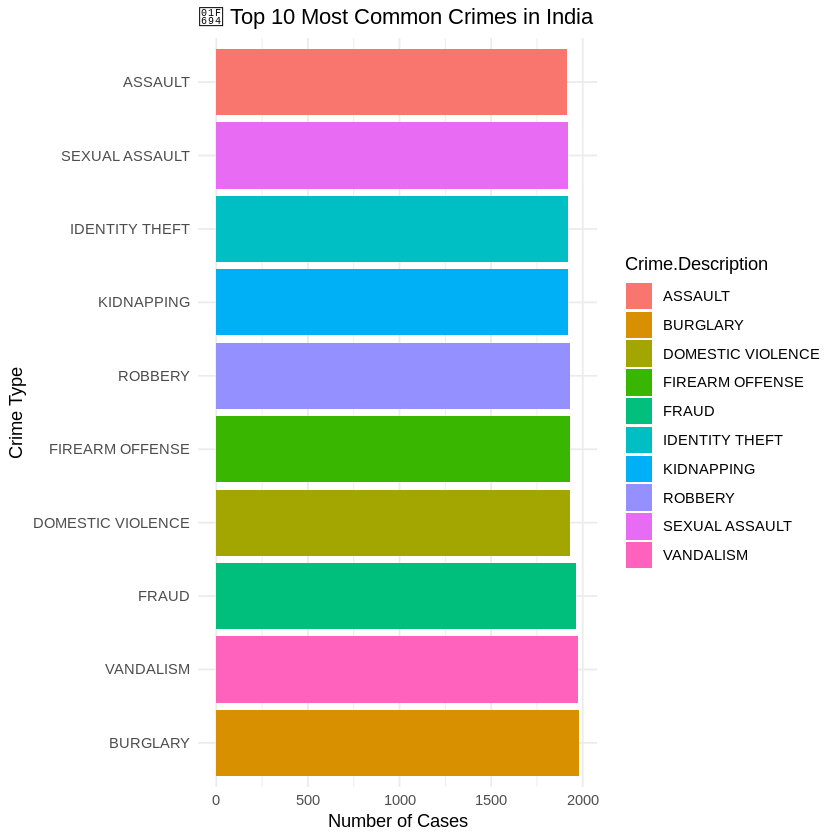

In [ ]:
# Visualization: Most Common Crimes
ggplot(top_crimes, aes(x = reorder(Crime.Description, -Frequency), y = Frequency, fill=Crime.Description)) +
  geom_bar(stat="identity") +
  coord_flip() +
  ggtitle("🚔 Top 10 Most Common Crimes in India") +
  xlab("Crime Type") +
  ylab("Number of Cases") +
  theme_minimal()


In [ ]:

# Step 5: Crime Hotspot Detection (Clustering)

city_crime <- crime_data %>%
  group_by(City) %>%
  summarise(Crime_Count = n()) %>%
  arrange(desc(Crime_Count))


In [ ]:
# Apply K-Means Clustering to find crime hotspots
set.seed(123)
kmeans_result <- kmeans(city_crime$Crime_Count, centers=3)
city_crime$Cluster <- as.factor(kmeans_result$cluster)
print(kmeans_result)

K-means clustering with 3 clusters of sizes 7, 19, 3

Cluster means:
       [,1]
1 2122.2857
2  626.3684
3 4467.6667

Clustering vector:
 [1] 3 3 3 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

Within cluster sum of squares by cluster:
[1] 1828667 1298274 1645833
 (between_SS / total_SS =  90.1 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      


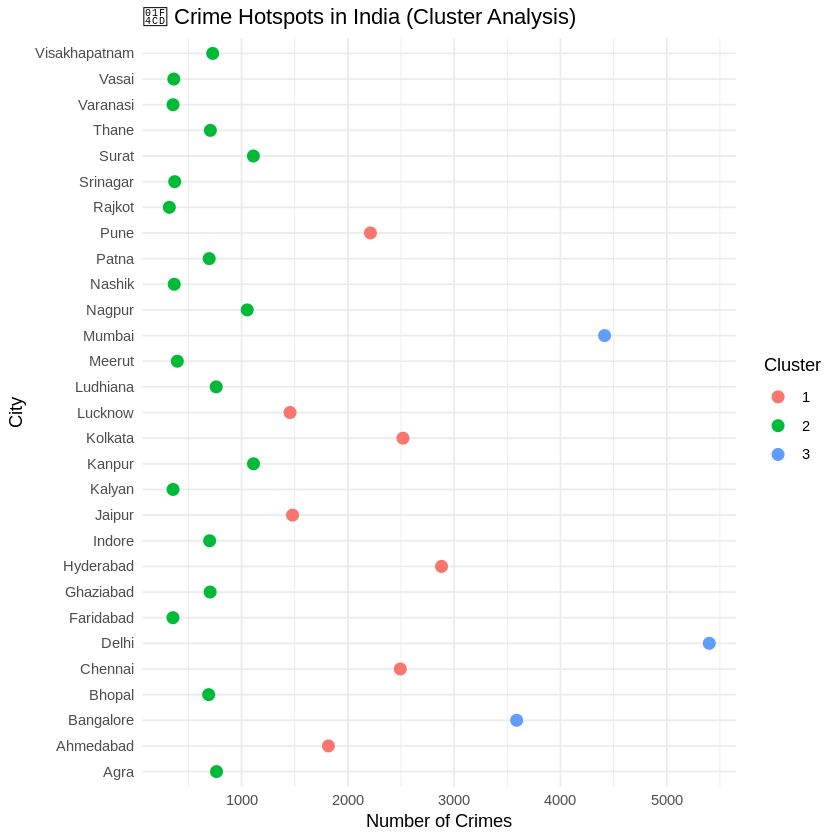

In [ ]:
# Visualization: Crime Hotspots in India
ggplot(city_crime, aes(x=City, y=Crime_Count, color=Cluster)) +
  geom_point(size=3) +
  coord_flip() +
  ggtitle("📍 Crime Hotspots in India (Cluster Analysis)") +
  xlab("City") +
  ylab("Number of Crimes") +
  theme_minimal()

In [ ]:
# Step 6: Association Rule Mining (Crime Relationships)
crime_rules <- apriori(crime_data[, c("Crime.Description", "City")],
                       parameter = list(supp = 0.01, conf = 0.5))
inspect(head(sort(crime_rules, by="lift"), 5))


Warning message:
“Column(s) 1, 2 not logical or factor. Applying default discretization (see '? discretizeDF').”


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 401 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[50 item(s), 40160 transaction(s)] done [0.01s].
sorting and recoding items ... [42 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [ ]:

# Step 7: Crime Seasonality Analysis (Heatmap)

crime_heatmap <- crime_data %>%
  mutate(Year = year(Date.Reported), Month = month(Date.Reported, label=TRUE)) %>%
  group_by(Year, Month) %>%
  summarise(Crime_Count = n()) %>%
  dcast(Year ~ Month, value.var="Crime_Count", fill=0)
print(crime_heatmap)

`summarise()` has grouped output by 'Year'. You can override using the
`.groups` argument.


  Year Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1 2020 706 696 748 718 741 723 743 743 717 750 718 744
2 2021 745 676 739 724 745 716 748 735 725 744 722 747
3 2022 740 671 749 715 749 711 745 746 725 739 722 747
4 2023 736 677 742 726 740 724 739 752 715 743 722 745
5 2024 735 698 747 720 736 735 734  22   0   0   0   0


In [ ]:


# Final Insights & Recommendations
ggsave("crime_forecast.png", width=8, height=6)
ggsave("top_crimes.png", width=8, height=6)
ggsave("crime_hotspots.png", width=8, height=6)